Maya Asher, 4/17/24
# Analyzing the SBCSAE
**NEW CONTINUING**

Using the processed data (which can be found [here](https://github.com/Data-Science-for-Linguists-2024/Stance-Taking-in-Spontaneous-Speech/blob/main/reprocessing_sbcsae.ipynb)) we can begin our stance taking anaylsis.

## Object of analysis
**TL;DR**: This analysis will focus on lexical items that vary in their levels of investment (*like* vs. *love* and *don't like* vs. *hate*). This is based on a three dimensional model of analyzing stance and stanctaking explained in Kiesling (2022).
### Background
As Dr. Scott Kiesling discusses in his paper "Stance and Stancetaking" (2022), stance is how people position themselves in conversations and it can be analyzed using a three-dimensional model that encompasses **evaluation**, **alignment**, and **investment**. In a simple conversation, animator A evaluates an object, prompting animator B to also evaluate that object, resulting in an alignment or disalignment between the two interlocutors. Investment is the extent to which each person commits to their evaluation. 

So, for example, if I were to say "I really love data science," I am indexing a large amount of investment to my evaluation of data science. Then, if my interlocutor were to respond, "I kind of like data science," we are somewhat aligning by speaking of data science in a positive light, but they are indexing less investment in their evaluation than I am. 

In the example above, investment was indexed through the lexical items *really love* and *kind of like*, but an animator's level of investment can also be indicated through epistemicity and evidentiality.

In this three-dimensional model of analysis, there are also three participant roles: the **author** who composes the essential text, the **animator** who produces the speech, and the **principal** who takes responsibility for the utterance. This idea will be explored later on in the analysis.
### Current investigation
With the idea of investment established, my focus for this project will be to identify lexical items that index varying levels of investment and analyze their contexts and frequencies, producing both qualitative and quantitative results that can be compared to one another. 

Specifically, I will look at *like* vs. *love* and *don't like* vs. *hate*, both varying in levels of investment but the former being positive and the latter being negative. To do this, we will unpickle our dictionaries of data frames and begin our search for our target words.

### Citation
Kiesling, S. F. (2022). Stance and Stancetaking. *Annual Review of Linguistics*, 8, 409-426. https://doi.org/10.1146/annurev-linguistics-031120-121256

## Import

In [24]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
%pprint

Pretty printing has been turned OFF


## Unpickle

In [2]:
f = open('all_dfs.pkl', 'rb')
dfs = pickle.load(f)
f.close()

In [3]:
f = open('df2col.pkl', 'rb')
df2c = pickle.load(f)
f.close()

In [4]:
f = open('df3col.pkl', 'rb')
df3c = pickle.load(f)
f.close()

In [5]:
f = open('df4col.pkl', 'rb')
df4c = pickle.load(f)
f.close()

In [6]:
# looks good
print(df3c.keys(), df2c.keys(), df4c.keys())

dict_keys(['SBC001.trn', 'SBC002.trn', 'SBC003.trn', 'SBC004.trn', 'SBC005.trn', 'SBC006.trn', 'SBC007.trn', 'SBC008.trn', 'SBC009.trn', 'SBC010.trn', 'SBC011.trn', 'SBC013.trn']) dict_keys(['SBC014.trn']) dict_keys(['SBC015.trn', 'SBC016.trn', 'SBC017.trn', 'SBC018.trn', 'SBC019.trn', 'SBC022.trn', 'SBC023.trn', 'SBC024.trn', 'SBC029.trn', 'SBC031.trn', 'SBC032.trn', 'SBC033.trn', 'SBC034.trn', 'SBC035.trn', 'SBC036.trn', 'SBC037.trn', 'SBC042.trn', 'SBC043.trn', 'SBC044.trn', 'SBC045.trn', 'SBC047.trn', 'SBC048.trn', 'SBC049.trn', 'SBC050.trn', 'SBC051.trn', 'SBC056.trn', 'SBC057.trn', 'SBC058.trn', 'SBC059.trn', 'SBC060.trn'])


In [7]:
# got them all!
len(df4c) + len(df3c) + len(df2c)

43

In [8]:
# perfect!
len(dfs)

43

## Investigate text
Since we labeled each dictionary's df columns the same (at least for `text`), we can use the dictionary that has ALL of the dfs!

In [9]:
dfs["SBC014.trn"].head() # 2 col

,time_speaker,text
0,0.00 2.53 FRED:,... Okay.
1,2.53 4.73,"One= large loan (Hx),"
2,4.73 6.23,"... renewed (Hx),"
3,6.23 8.08,"... a hundred ninety-seven= .. thousand,"
4,8.08 9.23,a hundred eighty dollars.


In [10]:
dfs["SBC013.trn"].head() # 3 col

,time,speaker,text
0,0.00 1.24,KEVIN:,Is that just [carbonated water]?
1,0.45 1.24,WENDY:,[No thank you].
2,1.24 1.50,,"[2No,"
3,1.24 3.38,KEN:,[2(H) No this is2] crea=m [3soda.
4,1.50 2.36,WENDY:,It's cream soda2].


In [11]:
dfs["SBC015.trn"].head() # 4 col

,time_start,time_end,speaker,text
0,2.660,2.805,JOANNE:,"But,"
1,2.805,4.685,,so these slides <X should X> be real interesting.
2,6.140,6.325,KEN:,... Yeah.
3,6.325,7.710,,I think it'll be real interesting
4,7.710,8.535,,"I think it'll be a real,"


## Extract lexical items
The two lexical items we want are 'like' and 'love'. We will create a dictionary for each word with the key being the file name (ex: `SBC001.trn`) and the value being a list of tuples that look like (row number, 'like' in context). Thankfully, we can work with `dfs` because all the `text` columns are labeled as such.

In [12]:
likes = {}
loves = {}

# iterate through each df in the dict
for df_name, df in dfs.items():
    
    # extract rows where the target word is found in the text column
    like_rows = df[df['text'].str.contains(r'\blike\b', case=False, regex=True)]
    love_rows = df[df['text'].str.contains(r'\blove\b', case=False, regex=True)]
    
    # list of tuples containing (row #, text) for each occurrence
    like_occurrences = [(index, row['text']) for index, row in like_rows.iterrows()]
    love_occurrences = [(index, row['text']) for index, row in love_rows.iterrows()]
   
    # save the occurrences in the dict
    likes[df_name] = like_occurrences
    loves[df_name] = love_occurrences

I can't flash `likes` because it is too large, but the other dictionaries relatively sparse. Hopefully there will still be enough qualitative information that can be extracted, but I worry that there will be no sufficient quantitative data. 

In [13]:
loves

{'SBC001.trn': [], 'SBC002.trn': [], 'SBC003.trn': [(1008, "I'd love to do gray water,"), (1262, '... Oh I love green beans.')], 'SBC004.trn': [(68, '[2They love to --'), (70, '.. They love to point it out when <X I X>2] --'), (163, '                            [3I love it @>3].')], 'SBC005.trn': [(427, '... Love?'), (429, '[<VOX Love]?'), (431, '(H) Could [2I2] love you?'), (435, "(H) Could I love you while I'm here VOX>?"), (503, '... love fills the stockings.'), (515, 'adults around who love you.')], 'SBC006.trn': [], 'SBC007.trn': [], 'SBC008.trn': [], 'SBC009.trn': [], 'SBC010.trn': [], 'SBC011.trn': [(80, '... and I love you,')], 'SBC013.trn': [(1859, '... <VOX True love VOX>.'), (1961, '    [I love] new windshield wipers.'), (2152, '.. Oh I love [!Edna].')], 'SBC014.trn': [(981, '.. I love ... expansions of business.')], 'SBC015.trn': [(236, 'I would love --'), (237, '.. I would love to go=.'), (684, '             [6Cats love those6].'), (1308, '.. I love the little fl- --'), (1

## Extract discourse markers

In [14]:
wells = {}
fines = {}
goods = {}
greats = {}
rights = {}
imeans = {}

# iterate through each df in the dict
for df_name, df in dfs.items():
    
    # extract rows where the target word is found in the text column
    well_rows = df[df['text'].str.contains(r'\bwell\b', case=False, regex=True)]
    fine_rows = df[df['text'].str.contains(r'\bfine\b', case=False, regex=True)]
    good_rows = df[df['text'].str.contains(r'\bgood\b', case=False, regex=True)]
    great_rows = df[df['text'].str.contains(r'\bgreat\b', case=False, regex=True)]
    right_rows = df[df['text'].str.contains(r'\bright\b', case=False, regex=True)]
    imean_rows = df[df['text'].str.contains(r'\bI\smean\b', case=False, regex=True)]

    # list of tuples containing (row #, text) for each occurrence
    well_occurrences = [(index, row['text']) for index, row in well_rows.iterrows()]
    fine_occurrences = [(index, row['text']) for index, row in fine_rows.iterrows()]
    good_occurrences = [(index, row['text']) for index, row in good_rows.iterrows()]
    great_occurrences = [(index, row['text']) for index, row in great_rows.iterrows()]
    right_occurrences = [(index, row['text']) for index, row in right_rows.iterrows()]
    imean_occurrences = [(index, row['text']) for index, row in imean_rows.iterrows()]

    # save the occurrences in the dict
    wells[df_name] = well_occurrences
    fines[df_name] = fine_occurrences
    goods[df_name] = good_occurrences
    greats[df_name] = great_occurrences
    rights[df_name] = right_occurrences
    imeans[df_name] = imean_occurrences

## Trying out analysis with only "good"

In [15]:
goods["SBC001.trn"]

[(24, "(H) ... and I'm not as good,"), (40, ".. (H)= and I'm not (Hx) ... that good or,"), (496, "cause you don't want to .. cripple up a .. (H) really good horse,")]

In [16]:
indices = {key: [tpl[0] for tpl in value] for key, value in goods.items()}
print(indices)

{'SBC001.trn': [24, 40, 496], 'SBC002.trn': [236, 490, 874, 940, 1407], 'SBC003.trn': [61, 62, 111, 410, 754, 765, 768, 932, 935, 947, 1003, 1098, 1263, 1430, 1433, 1453, 1476], 'SBC004.trn': [12, 25, 28, 330, 331, 610, 819, 852, 864], 'SBC005.trn': [65], 'SBC006.trn': [179, 542, 721, 744, 1167, 1206, 1226, 1410, 1746], 'SBC007.trn': [93, 578], 'SBC008.trn': [1029, 1488], 'SBC009.trn': [688], 'SBC010.trn': [766, 993], 'SBC011.trn': [171, 197, 198, 384, 602, 652, 755, 849], 'SBC013.trn': [247, 339, 382, 786, 787, 854, 865, 968, 1232, 1430, 1716, 1743, 1760, 1761, 1787, 1789, 1813, 1821, 1994, 1996, 2207, 2234], 'SBC014.trn': [493, 617, 641, 657, 843], 'SBC015.trn': [5, 692, 709, 764], 'SBC016.trn': [3, 13, 81, 386, 388, 523, 617, 694, 1070, 1135, 1148, 1417, 1485, 1489, 1490, 1506, 1507], 'SBC017.trn': [], 'SBC018.trn': [4, 106, 163, 176], 'SBC019.trn': [96, 247, 251, 292, 296, 302, 402, 403, 734, 1015, 1190], 'SBC022.trn': [5, 23, 316, 336, 366, 367, 404, 405, 418, 453], 'SBC023.trn': 

In [17]:
# with open('goods_output.txt', 'w') as file:
#     import sys
#     sys.stdout = file
    
#     for index in indices:
#         df = dfs[index]
#         print(index)
#         key = index
#         values = indices[key]
#         for v in values:
#             first = v - 10
#             last = v + 10
#             print(df.iloc[first:last])
# sys.stdout = sys.__stdout__

## Pipeline for outputs

In [18]:
# targets = [likes, loves, wells, fines, goods, greats, rights, imeans]
# targets_str = ['likes', 'loves', 'wells', 'fines', 'goods', 'greats', 'rights', 'imeans']
# count = 0

# for target in targets:
#     # establish indices
#     indices = {key: [tpl[0] for tpl in value] for key, value in target.items()}
    
#     # write out file
#     with open(targets_str[count]+"_output.txt", 'w') as file:
    
#         import sys
#         sys.stdout = file
        
#         for index in indices:
#             df = dfs[index]
#             print(index)
#             key = index
#             values = indices[key]
#             # give 20 lines of context
#             for v in values:
#                 first = v - 10
#                 last = v + 10
#                 print(df.iloc[first:last])
#     count+=1
            
#     sys.stdout = sys.__stdout__

## Figures and Plots

In [20]:
targets = [likes, loves, wells, fines, goods, greats, rights, imeans]
targets_str = ['likes', 'loves', 'wells', 'fines', 'goods', 'greats', 'rights', 'imeans']
count = 0
all_items = {}

for target in targets:
    # establish indices
    running_total = 0
    indices = {key: [tpl[0] for tpl in value] for key, value in target.items()}
    for key, value in indices.items():
        running_total += len(value)
    all_items[targets_str[count]] = running_total
    count+=1

In [21]:
all_items

{'likes': 1833, 'loves': 68, 'wells': 1074, 'fines': 63, 'goods': 390, 'greats': 115, 'rights': 722, 'imeans': 432}

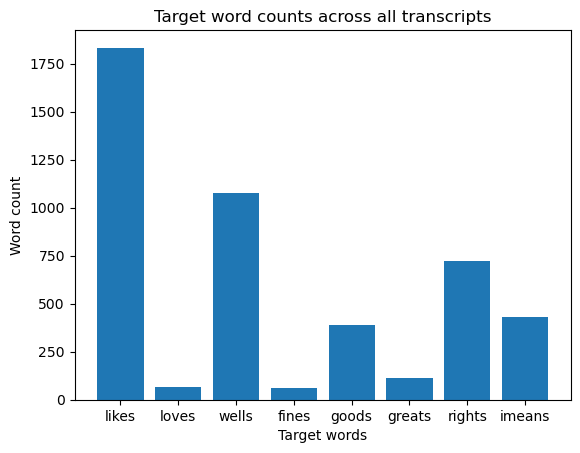

In [29]:
fig, ax = plt.subplots()

keys = list(all_items.keys())
values = list(all_items.values())

ax.bar(keys, values)
plt.xlabel('Target words')
plt.ylabel('Word count')
plt.title('Target word counts across all transcripts')

plt.show()